In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading data

In [2]:
df = pd.read_csv('datathon_SC_ACN_22/orders.csv', delimiter=';')
df = df.replace('ATHENAS','Athens')
df = df.replace('BCN','Barcelona')

In [8]:
f, t=df['late_order'].value_counts()
f, t

(87120, 27156)

In [9]:
T = df[df['late_order']==True]
F = df[df['late_order']==False]
tru = T.sample(f, replace= True)
df = pd.concat([tru, F], axis=0)

In [14]:
df_late = df[df['late_order'] == True]

In [15]:
df_late.reset_index(inplace=True)
del df_late['index']

## Exploratory Analysis

In [17]:
# Percentage of orders arriving late from origin: Rotterdam
R1 = (df_late['origin_port'] == 'Rotterdam').value_counts()[True] #Orders arriving late
Rtot = (df['origin_port'] == 'Rotterdam').value_counts()[True].sum() #Total orders
R1 / Rtot

0.39317206529898824

In [18]:
# Percentage of orders arriving late from origin: Barcelona
B1 = (df_late['origin_port'] == 'Barcelona').value_counts()[True]
Btot = (df['origin_port'] == 'Barcelona').value_counts()[True].sum()
B1 / Btot

0.5456882111707965

In [19]:
# Percentage of orders arriving late from origin: Athens
A1 = (df_late['origin_port'] == 'Athens').value_counts()[True]
Atot = (df['origin_port'] == 'Athens').value_counts()[True].sum()
A1 / Atot

0.6579036197208268

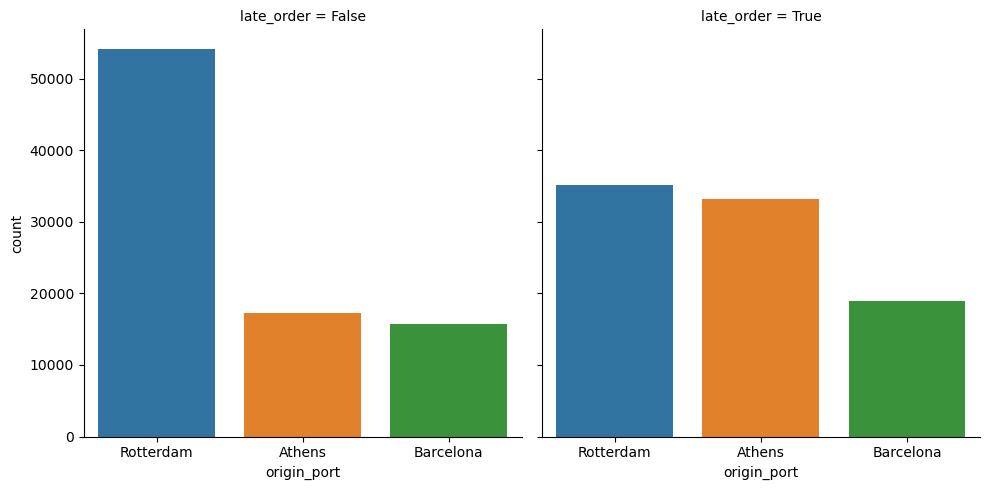

In [20]:
sns.catplot(x='origin_port',
            col='late_order',
            kind='count',
            data=df)

In [21]:
df.value_counts(['customs_procedures'])

customs_procedures
CRF                   73689
DTD                   67889
DTP                   32662
dtype: int64

In [22]:
CRF1 = (df_late['customs_procedures'] == 'CRF').value_counts()[True] #Orders arriving late
CRFtot = (df['customs_procedures'] == 'CRF').value_counts()[True].sum() #Total orders
CRF1 / CRFtot

0.439889264340675

In [23]:
DTD1 = (df_late['customs_procedures'] == 'DTD').value_counts()[True] #Orders arriving late
DTDtot = (df['customs_procedures'] == 'DTD').value_counts()[True].sum() #Total orders
DTD1 / DTDtot

0.5205703427653965

In [24]:
DTP1 = (df_late['customs_procedures'] == 'DTP').value_counts()[True] #Orders arriving late
DTPtot = (df['customs_procedures'] == 'DTP').value_counts()[True].sum() #Total orders
DTP1 / DTPtot

0.5928602045190129

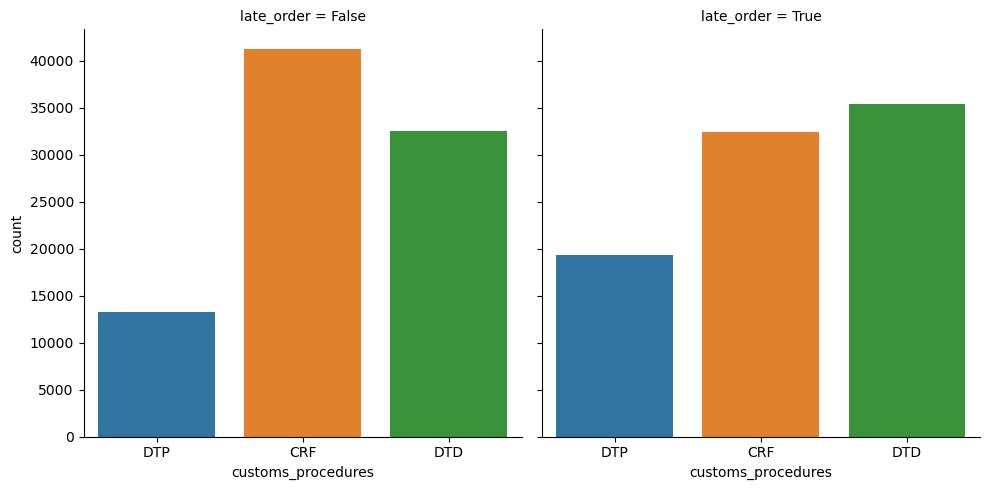

In [25]:
sns.catplot(x='customs_procedures',
            col='late_order',
            kind='count',
            data=df)

In [26]:
df.value_counts(['logistic_hub'])

logistic_hub
Venlo           33402
Hamburg         31026
Warsaw          23801
Rome            19513
Lille           18446
Dusseldorf      17626
Zaragoza        13874
Bratislava       7871
Liege            6950
dtype: int64

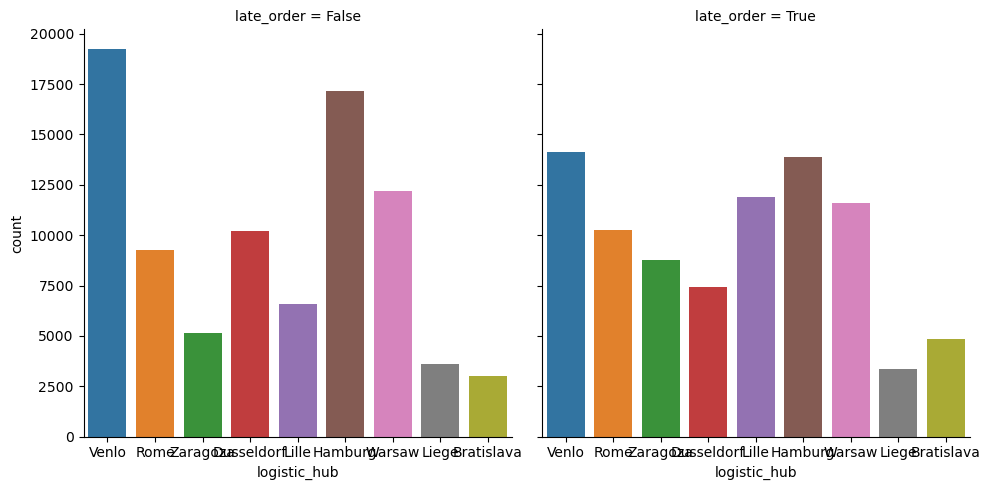

In [27]:
sns.catplot(x='logistic_hub',
            col='late_order',
            kind='count',
            data=df)

In [28]:
df_cities = pd.read_csv('datathon_SC_ACN_22/cities_data.csv', delimiter=';')

In [29]:
df_cities

,city_from_name,city_to_name,city_from_coord,city_to_coord,distance
0,Dusseldorf,Zaragoza,"(51.2254018, 6.7763137)","(41.6521342, -0.8809428)",1214.4772
1,Dusseldorf,Venlo,"(51.2254018, 6.7763137)","(51.39244885, 6.1511724144122955)",47.3876
2,Dusseldorf,Bratislava,"(51.2254018, 6.7763137)","(48.1516988, 17.1093063)",819.2894
3,Dusseldorf,Hamburg,"(51.2254018, 6.7763137)","(53.550341, 10.000654)",339.2215
4,Dusseldorf,Rome,"(51.2254018, 6.7763137)","(41.8933203, 12.4829321)",1125.0290
...,...,...,...,...,...
661,Rotterdam,Helsinki,"(51.9244424, 4.47775)","(60.1674881, 24.9427473)",1560.6484
662,Rotterdam,Prague,"(51.9244424, 4.47775)","(50.0874654, 14.4212535)",726.5575
663,Rotterdam,Valencia,"(51.9244424, 4.47775)","(39.4697065, -0.3763353)",1434.1499
664,Rotterdam,Bremen,"(51.9244424, 4.47775)","(53.0758196, 8.8071646)",320.6459


In [30]:
df_cities = df_cities.rename({'city_from_name':'logistic_hub'}, axis='columns')
df_cities = df_cities.rename({'city_to_name':'customer'}, axis='columns')

In [31]:
df_cities

,logistic_hub,customer,city_from_coord,city_to_coord,distance
0,Dusseldorf,Zaragoza,"(51.2254018, 6.7763137)","(41.6521342, -0.8809428)",1214.4772
1,Dusseldorf,Venlo,"(51.2254018, 6.7763137)","(51.39244885, 6.1511724144122955)",47.3876
2,Dusseldorf,Bratislava,"(51.2254018, 6.7763137)","(48.1516988, 17.1093063)",819.2894
3,Dusseldorf,Hamburg,"(51.2254018, 6.7763137)","(53.550341, 10.000654)",339.2215
4,Dusseldorf,Rome,"(51.2254018, 6.7763137)","(41.8933203, 12.4829321)",1125.0290
...,...,...,...,...,...
661,Rotterdam,Helsinki,"(51.9244424, 4.47775)","(60.1674881, 24.9427473)",1560.6484
662,Rotterdam,Prague,"(51.9244424, 4.47775)","(50.0874654, 14.4212535)",726.5575
663,Rotterdam,Valencia,"(51.9244424, 4.47775)","(39.4697065, -0.3763353)",1434.1499
664,Rotterdam,Bremen,"(51.9244424, 4.47775)","(53.0758196, 8.8071646)",320.6459


In [32]:
df

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order
103238,4ae8df0c2f6b,Rotterdam,v_004,DTP,Venlo,Stockholm,1690628,507,True
5135,f7e61794ca0a,Athens,v_004,CRF,Venlo,Madrid,1676563,479,True
73979,8fd8ab85a388,Rotterdam,v_004,CRF,Rome,Berlin,1650715,752,True
108048,4d4db9cf2118,Athens,v_002,DTD,Zaragoza,Lyon,1699564,464,True
102381,adfa57775ee7,Rotterdam,v_004,CRF,Venlo,Helsinki,1680210,493,True
...,...,...,...,...,...,...,...,...,...
114271,3f4b15fb770e,Rotterdam,v_002,CRF,Dusseldorf,Bordeaux,1681376,645,False
114272,d2e6978a38fd,Barcelona,v_004,DTD,Dusseldorf,Berlin,1676942,502,False
114273,b88babd5c7bd,Rotterdam,v_002,DTP,Dusseldorf,Rome,1692737,464,False
114274,b0b5c761613f,Barcelona,v_003,DTD,Dusseldorf,Munich,1699974,388,False


In [33]:
df_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   logistic_hub     666 non-null    object 
 1   customer         666 non-null    object 
 2   city_from_coord  666 non-null    object 
 3   city_to_coord    666 non-null    object 
 4   distance         666 non-null    float64
dtypes: float64(1), object(4)
memory usage: 26.1+ KB


In [34]:
df_m = df.merge(df_cities, how='left', on=['logistic_hub', 'customer']) #Left 3526615 #Right 3525953 # 3525566

In [35]:
df_m

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order,city_from_coord,city_to_coord,distance
0,4ae8df0c2f6b,Rotterdam,v_004,DTP,Venlo,Stockholm,1690628,507,True,"(51.39244885, 6.1511724144122955)","(59.3251172, 18.0710935)",1159.0472
1,f7e61794ca0a,Athens,v_004,CRF,Venlo,Madrid,1676563,479,True,"(51.39244885, 6.1511724144122955)","(40.4167047, -3.7035825)",1436.9241
2,8fd8ab85a388,Rotterdam,v_004,CRF,Rome,Berlin,1650715,752,True,"(41.8933203, 12.4829321)","(52.5170365, 13.3888599)",1183.0545
3,4d4db9cf2118,Athens,v_002,DTD,Zaragoza,Lyon,1699564,464,True,"(41.6521342, -0.8809428)","(45.7578137, 4.8320114)",647.8470
4,adfa57775ee7,Rotterdam,v_004,CRF,Venlo,Helsinki,1680210,493,True,"(51.39244885, 6.1511724144122955)","(60.1674881, 24.9427473)",1521.8218
...,...,...,...,...,...,...,...,...,...,...,...,...
174235,3f4b15fb770e,Rotterdam,v_002,CRF,Dusseldorf,Bordeaux,1681376,645,False,"(51.2254018, 6.7763137)","(44.841225, -0.5800364)",896.2065
174236,d2e6978a38fd,Barcelona,v_004,DTD,Dusseldorf,Berlin,1676942,502,False,"(51.2254018, 6.7763137)","(52.5170365, 13.3888599)",477.3717
174237,b88babd5c7bd,Rotterdam,v_002,DTP,Dusseldorf,Rome,1692737,464,False,"(51.2254018, 6.7763137)","(41.8933203, 12.4829321)",1125.0290
174238,b0b5c761613f,Barcelona,v_003,DTD,Dusseldorf,Munich,1699974,388,False,"(51.2254018, 6.7763137)","(48.1371079, 11.5753822)",487.5926


In [36]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174240 entries, 0 to 174239
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   order_id            174240 non-null  object 
 1   origin_port         174240 non-null  object 
 2   3pl                 174240 non-null  object 
 3   customs_procedures  174240 non-null  object 
 4   logistic_hub        172509 non-null  object 
 5   customer            174240 non-null  object 
 6   product_id          174240 non-null  int64  
 7   units               174240 non-null  int64  
 8   late_order          174240 non-null  bool   
 9   city_from_coord     170307 non-null  object 
 10  city_to_coord       170307 non-null  object 
 11  distance            170307 non-null  float64
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 16.1+ MB


In [37]:
df_m['3pl'] = df_m['3pl'].astype('category')
df_m['3pl'] =df_m['3pl'].cat.codes
df_m['3pl'].value_counts()

df_m['logistic_hub'] = df_m['logistic_hub'].astype('category')
df_m['logistic_hub'] =df_m['logistic_hub'].cat.codes
df_m['logistic_hub'].value_counts()


df_m['customer'] = df_m['customer'].astype('category')
df_m['customer'] =df_m['customer'].cat.codes
df_m['customer'].value_counts()



3     14139
14    14106
17    14085
20    11136
27    10317
18     8580
13     8370
24     7806
0      7767
9      7701
2      6661
16     6621
23     5735
8      5484
6      5138
1      4944
7      4020
19     3959
12     3659
15     3367
10     3130
25     3108
4      2815
11     2668
26     2504
22     2369
5      2211
21     1840
Name: customer, dtype: int64

In [38]:
df_m

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order,city_from_coord,city_to_coord,distance
0,4ae8df0c2f6b,Rotterdam,3,DTP,6,24,1690628,507,True,"(51.39244885, 6.1511724144122955)","(59.3251172, 18.0710935)",1159.0472
1,f7e61794ca0a,Athens,3,CRF,6,14,1676563,479,True,"(51.39244885, 6.1511724144122955)","(40.4167047, -3.7035825)",1436.9241
2,8fd8ab85a388,Rotterdam,3,CRF,5,3,1650715,752,True,"(41.8933203, 12.4829321)","(52.5170365, 13.3888599)",1183.0545
3,4d4db9cf2118,Athens,1,DTD,8,13,1699564,464,True,"(41.6521342, -0.8809428)","(45.7578137, 4.8320114)",647.8470
4,adfa57775ee7,Rotterdam,3,CRF,6,11,1680210,493,True,"(51.39244885, 6.1511724144122955)","(60.1674881, 24.9427473)",1521.8218
...,...,...,...,...,...,...,...,...,...,...,...,...
174235,3f4b15fb770e,Rotterdam,1,CRF,1,4,1681376,645,False,"(51.2254018, 6.7763137)","(44.841225, -0.5800364)",896.2065
174236,d2e6978a38fd,Barcelona,3,DTD,1,3,1676942,502,False,"(51.2254018, 6.7763137)","(52.5170365, 13.3888599)",477.3717
174237,b88babd5c7bd,Rotterdam,1,DTP,1,23,1692737,464,False,"(51.2254018, 6.7763137)","(41.8933203, 12.4829321)",1125.0290
174238,b0b5c761613f,Barcelona,2,DTD,1,18,1699974,388,False,"(51.2254018, 6.7763137)","(48.1371079, 11.5753822)",487.5926


In [39]:
df_merged = df_m.replace('Athens', 0)
df_merged = df_merged.replace('Barcelona', 1)
df_merged = df_merged.replace('Rotterdam', 2)

In [41]:
df_merged = df_merged.replace('DTP', 0)
df_merged = df_merged.replace('DTD', 1)
df_merged = df_merged.replace('CRF', 2)


df_merged

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order,city_from_coord,city_to_coord,distance
0,4ae8df0c2f6b,2,3,0,6,24,1690628,507,True,"(51.39244885, 6.1511724144122955)","(59.3251172, 18.0710935)",1159.0472
1,f7e61794ca0a,0,3,2,6,14,1676563,479,True,"(51.39244885, 6.1511724144122955)","(40.4167047, -3.7035825)",1436.9241
2,8fd8ab85a388,2,3,2,5,3,1650715,752,True,"(41.8933203, 12.4829321)","(52.5170365, 13.3888599)",1183.0545
3,4d4db9cf2118,0,1,1,8,13,1699564,464,True,"(41.6521342, -0.8809428)","(45.7578137, 4.8320114)",647.8470
4,adfa57775ee7,2,3,2,6,11,1680210,493,True,"(51.39244885, 6.1511724144122955)","(60.1674881, 24.9427473)",1521.8218
...,...,...,...,...,...,...,...,...,...,...,...,...
174235,3f4b15fb770e,2,1,2,1,4,1681376,645,False,"(51.2254018, 6.7763137)","(44.841225, -0.5800364)",896.2065
174236,d2e6978a38fd,1,3,1,1,3,1676942,502,False,"(51.2254018, 6.7763137)","(52.5170365, 13.3888599)",477.3717
174237,b88babd5c7bd,2,1,0,1,23,1692737,464,False,"(51.2254018, 6.7763137)","(41.8933203, 12.4829321)",1125.0290
174238,b0b5c761613f,1,2,1,1,18,1699974,388,False,"(51.2254018, 6.7763137)","(48.1371079, 11.5753822)",487.5926


In [43]:
df_merged['late_order'].value_counts()

True     87120
False    87120
Name: late_order, dtype: int64

In [44]:
df_prod = pd.read_csv('datathon_SC_ACN_22/product_attributes.csv')
df_prod

,product_id,weight,material_handling
0,1672707,2876,3
1,1694456,2785,5
2,1682865,2751,3
3,1689146,2736,0
4,1664069,2707,4
...,...,...,...
767,1682793,162,0
768,1683403,161,1
769,1699799,153,3
770,1699768,139,5


In [45]:
df_m2 = df_merged.merge(df_prod, on='product_id', how='left')
df_m2

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order,city_from_coord,city_to_coord,distance,weight,material_handling
0,4ae8df0c2f6b,2,3,0,6,24,1690628,507,True,"(51.39244885, 6.1511724144122955)","(59.3251172, 18.0710935)",1159.0472,747.0,3.0
1,f7e61794ca0a,0,3,2,6,14,1676563,479,True,"(51.39244885, 6.1511724144122955)","(40.4167047, -3.7035825)",1436.9241,804.0,5.0
2,8fd8ab85a388,2,3,2,5,3,1650715,752,True,"(41.8933203, 12.4829321)","(52.5170365, 13.3888599)",1183.0545,1895.0,4.0
3,4d4db9cf2118,0,1,1,8,13,1699564,464,True,"(41.6521342, -0.8809428)","(45.7578137, 4.8320114)",647.8470,1089.0,3.0
4,adfa57775ee7,2,3,2,6,11,1680210,493,True,"(51.39244885, 6.1511724144122955)","(60.1674881, 24.9427473)",1521.8218,216.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174235,3f4b15fb770e,2,1,2,1,4,1681376,645,False,"(51.2254018, 6.7763137)","(44.841225, -0.5800364)",896.2065,1896.0,3.0
174236,d2e6978a38fd,1,3,1,1,3,1676942,502,False,"(51.2254018, 6.7763137)","(52.5170365, 13.3888599)",477.3717,746.0,1.0
174237,b88babd5c7bd,2,1,0,1,23,1692737,464,False,"(51.2254018, 6.7763137)","(41.8933203, 12.4829321)",1125.0290,572.0,5.0
174238,b0b5c761613f,1,2,1,1,18,1699974,388,False,"(51.2254018, 6.7763137)","(48.1371079, 11.5753822)",487.5926,1894.0,1.0


In [46]:
df_m2['late_order'] = df_m2['late_order'].astype('category')
df_m2['late_order'] =df_m2['late_order'].cat.codes
df_m2['late_order'].value_counts()

1    87120
0    87120
Name: late_order, dtype: int64

In [47]:
del df_m2['city_from_coord']
del df_m2['city_to_coord']
del df_m2['order_id']
y = df_m2['late_order']
del df_m2['late_order']

In [48]:
data = df_m2.join(y)

<AxesSubplot:>

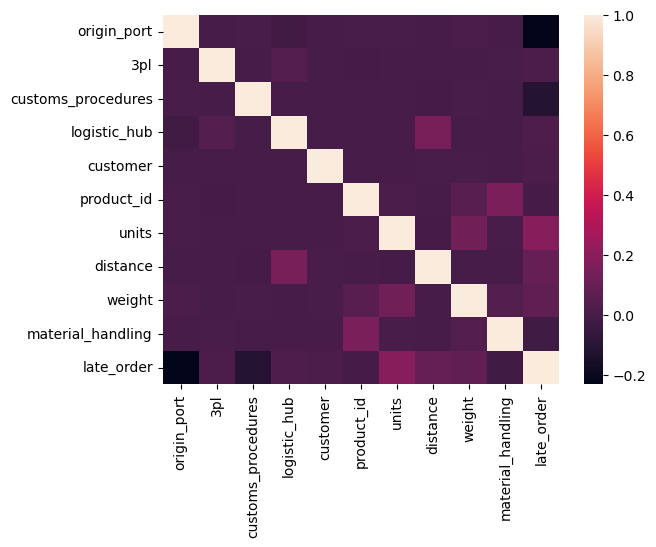

In [50]:
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


# def norm(x):
#     a = (x-x.min())/(x.max()-x.min())
#     return a

In [53]:
data['product_id'] = data['product_id'].astype('category')
data['customer'] = data['customer'].astype('category')
data['customs_procedures'] = data['customs_procedures'].astype('category')
data['origin_port'] = data['origin_port'].astype('category')
data['3pl'] = data['3pl'].astype('category')
data['logistic_hub'] = data['logistic_hub'].astype('category')
data['material_handling'] = data['material_handling'].astype('category')
data['late_order'] = data['late_order'].astype('category')

In [54]:
data['product_id'].value_counts()

1650715    5759
1613321    4919
1644308    3729
1657474    3426
1657437    2562
           ... 
1666441       2
1696753       1
1666470       1
1681700       1
1682594       1
Name: product_id, Length: 770, dtype: int64

In [55]:
data.to_csv('train.csv', index=False)

In [57]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(data, test_size=0.25, shuffle=True)

train_x = train.iloc[:, [0,2,3,4,6,7,8,9]] 
train_y = train.iloc[:,10]
val_x = val.iloc[:, [0,2,3,4,6,7,8,9]] 
val_y = val.iloc[:,10]

In [58]:
train_y.value_counts()

1    65436
0    65244
Name: late_order, dtype: int64

In [59]:
val_y.value_counts()

0    21876
1    21684
Name: late_order, dtype: int64

## Gradient Boosting

In [60]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix

clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1,
     max_depth=12, random_state=0).fit(np.nan_to_num(train_x), train_y)

plot_confusion_matrix(clf_gb, np.nan_to_num(val_x), val_y)

In [63]:
score = clf_gb.score(np.nan_to_num(val_x), val_y)
y_pred = clf_gb.predict(np.nan_to_num(val_x))
f1 = f1_score(val_y, y_pred)
f1, score

## Read Test

In [ ]:
test = pd.read_csv('datathon_SC_ACN_22/test.csv', delimiter=';')
test = test.replace('ATHENAS','Athens')
test = test.replace('BCN','Barcelona')

In [ ]:
df_test = test.merge(df_cities, how='left', on=['logistic_hub', 'customer'])

In [ ]:
df_testm = df_test.merge(df_prod, on='product_id', how='left')


In [ ]:
df_testm

In [ ]:
df_testm['3pl'] = df_testm['3pl'].astype('category')
df_testm['3pl'] =df_testm['3pl'].cat.codes

df_testm['logistic_hub'] = df_testm['logistic_hub'].astype('category')
df_testm['logistic_hub'] =df_testm['logistic_hub'].cat.codes

df_testm['customer'] = df_testm['customer'].astype('category')
df_testm['customer'] =df_testm['customer'].cat.codes

In [ ]:
df_testm

In [ ]:
df_testm = df_testm.replace('Athens', 0)
df_testm = df_testm.replace('Barcelona', 1)
df_testm = df_testm.replace('Rotterdam', 2)

df_testm = df_testm.replace('DTP', 0)
df_testm = df_testm.replace('DTD', 1)
df_testm = df_testm.replace('CRF', 2)

df_testm

In [ ]:
df_testm

In [ ]:
del df_testm['city_from_coord']
del df_testm['city_to_coord']
del df_testm['order_id']

In [ ]:
df_testm['product_id'].value_counts()

In [ ]:
df_testm['product_id'] = df_testm['product_id'].astype('category')
df_testm['customer'] = df_testm['customer'].astype('category')
df_testm['customs_procedures'] = df_testm['customs_procedures'].astype('category')
df_testm['origin_port'] = df_testm['origin_port'].astype('category')
df_testm['3pl'] = df_testm['3pl'].astype('category')
df_testm['logistic_hub'] = df_testm['logistic_hub'].astype('category')
df_testm['material_handling'] = df_testm['material_handling'].astype('category')

In [ ]:
y_pred_1 = clf_gb.predict(np.nan_to_num(df_testm.iloc[:, [0,2,3,4,6,7,8,9]]))

In [ ]:
sum(y_pred_1)/28563

In [ ]:
df_test['late_order']=y_pred_1

In [ ]:
result = df_test[['order_id','late_order']]

In [ ]:
result.to_csv('result.csv', index=False)